$\Large \text{Testing 1/4 degree simulation}$ 

The test run was forced with analytical wind stress, surface heat flux and freshwater forcing. Sponge was used in 2 deg region to restore temperature and salinity near the northern boundary. The run used EOS from Wright et al. (1997). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:34946 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 270.45 GB


$\large \text{Stats time series}$

In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"
ds_stat = xr.open_mfdataset(ppdir+"ocean.stats*.nc")
print(ds_stat)

ds_n = xr.open_mfdataset(ppdir+"prog_n*.nc",decode_times=False)
dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_n = xr.merge([ds_n, dsgrid])
print(ds_n)

<xarray.Dataset>
Dimensions:        (Interface: 76, Layer: 75, Time: 1802)
Coordinates:
  * Layer          (Layer) float64 0.5 2.393 6.02 ... 3.848e+03 3.949e+03
  * Interface      (Interface) float64 0.0 1.0 3.787 ... 3.898e+03 4e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 18000 days
Data variables:
    Ntrunc         (Time) float64 dask.array<chunksize=(361,), meta=np.ndarray>
    En             (Time) float64 dask.array<chunksize=(361,), meta=np.ndarray>
    APE            (Time, Interface) float64 dask.array<chunksize=(361, 76), meta=np.ndarray>
    KE             (Time, Layer) float64 dask.array<chunksize=(361, 75), meta=np.ndarray>
    H0             (Time, Interface) float64 dask.array<chunksize=(361, 76), meta=np.ndarray>
    Mass_lay       (Time, Layer) float64 dask.array<chunksize=(361, 75), meta=np.ndarray>
    Mass           (Time) float64 dask.array<chunksize=(361,), meta=np.ndarray>
    Mass_chg       (Time) float64 dask.array<chunksize=(361,), meta=n

Text(0, 0.5, 'Domain Mean Salinity (psu)')

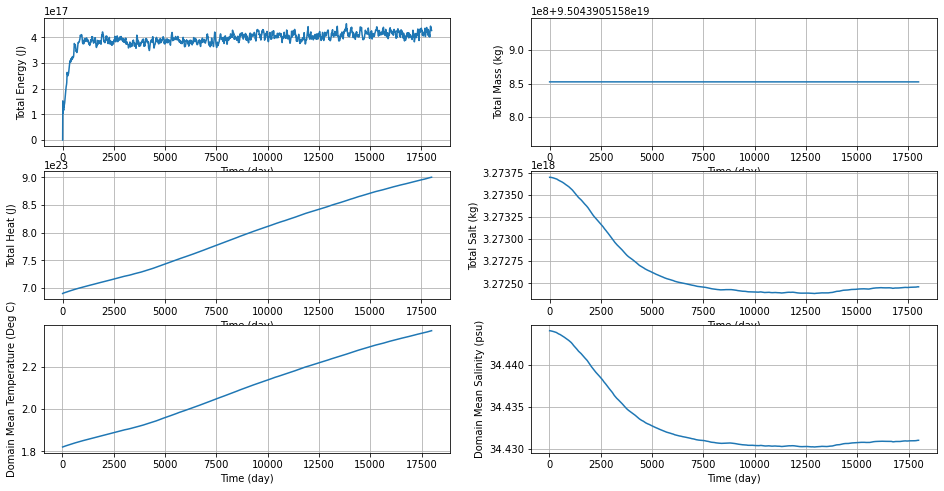

In [4]:
plt.figure(figsize=(16,8))

plt.subplot(3,2,1)
plt.plot(ds_stat['Time']/(24*3600*1e9), ds_stat['En'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')

plt.subplot(3,2,2)
plt.plot(ds_stat['Time']/(1e9*3600*24), ds_stat['Mass'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Mass (kg)')

plt.subplot(3,2,3)
plt.plot(ds_stat['Time']/(1e9*3600*24), ds_stat['Heat'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Heat (J)')

plt.subplot(3,2,4)
plt.plot(ds_stat['Time']/(1e9*3600*24), ds_stat['Salt'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Salt (kg)')

plt.subplot(3,2,5)
plt.plot(ds_n['Time'], ds_n['thetaoga'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Temperature (Deg C)')

plt.subplot(3,2,6)
plt.plot(ds_n['Time'], ds_n['soga'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Salinity (psu)')

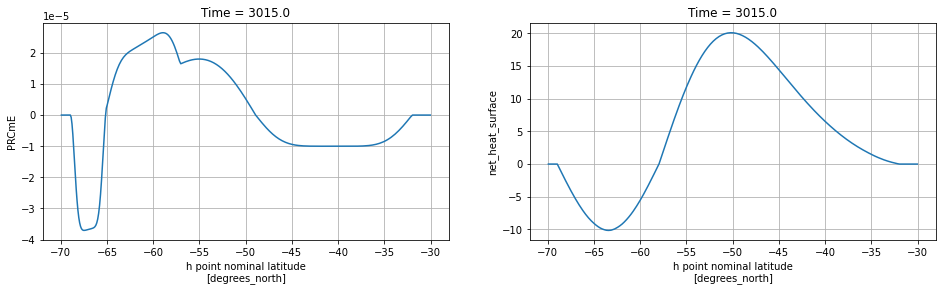

In [5]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ds_n['PRCmE'].isel(Time=100).mean('xh').plot()
plt.grid()

plt.subplot(1,2,2)
ds_n['net_heat_surface'].isel(Time=100).mean('xh').plot()
plt.grid()

In [6]:
ds_n.close()
ds_stat.close()

$\large \text{Spatial fields}$

In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"

ds_z = xr.open_mfdataset(ppdir+"prog_z*.nc",decode_times=False)
print(ds_z)

#ds_rho = xr.open_mfdataset(ppdir+"prog_rho2*.nc",decode_times=False)
#print(ds_rho)

<xarray.Dataset>
Dimensions:     (Time: 50, nv: 2, xh: 320, xq: 320, yh: 272, yq: 272, z_i: 36, z_l: 35)
Coordinates:
  * xh          (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * yh          (yh) float64 -69.94 -69.85 -69.77 ... -30.46 -30.24 -30.02
  * z_l         (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * z_i         (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * Time        (Time) float64 180.0 540.0 900.0 ... 1.746e+04 1.782e+04
  * nv          (nv) float64 1.0 2.0
  * xq          (xq) float64 0.25 0.5 0.75 1.0 1.25 ... 79.25 79.5 79.75 80.0
  * yq          (yq) float64 -69.89 -69.81 -69.72 ... -30.35 -30.13 -29.92
Data variables:
    temp        (Time, z_l, yh, xh) float32 dask.array<chunksize=(10, 35, 272, 320), meta=np.ndarray>
    salt        (Time, z_l, yh, xh) float32 dask.array<chunksize=(10, 35, 272, 320), meta=np.ndarray>
    u           (Time, z_l, yh, xq) float32 dask.array<chunksize=(10, 35, 272, 320)

In [4]:
dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_z = xr.merge([ds_z, dsgrid])
#ds_rho = xr.merge([ds_rho, dsgrid])

In [5]:
grid = Grid(ds_z, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

In [6]:
def pdens(S,theta):

    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    # To compute potential density keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals

    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S

    pot_dens = (p + p0)/(lambd + alpha0*(p + p0)) - 1000.

    return pot_dens

In [7]:
sigma = xr.apply_ufunc(pdens, ds_z['salt'], ds_z['temp'], dask='parallelized', output_dtypes=[ds_z['salt'].dtype])

print(sigma)

<xarray.DataArray (Time: 50, z_l: 35, yh: 272, xh: 320)>
dask.array<transpose, shape=(50, 35, 272, 320), dtype=float32, chunksize=(40, 35, 272, 320), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * yh       (yh) float64 -69.94 -69.85 -69.77 -69.68 ... -30.46 -30.24 -30.02
  * z_l      (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * Time     (Time) float64 180.0 540.0 900.0 ... 1.71e+04 1.746e+04 1.782e+04


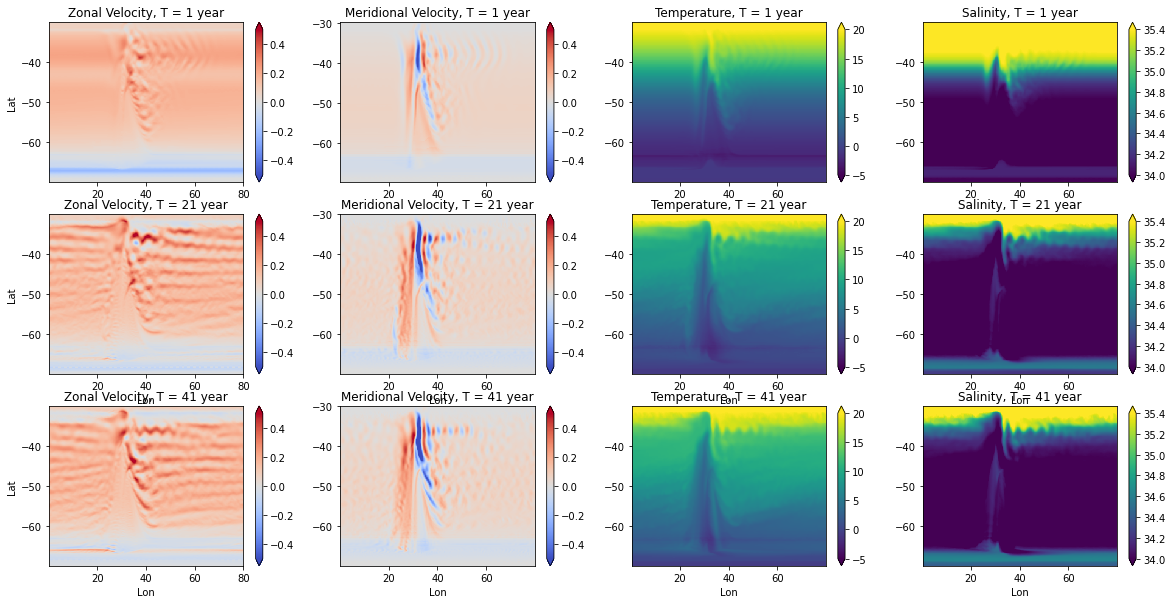

In [9]:
plt.figure(figsize=(20,10))

ct = 0
for i in range(0,50,20):
    plt.subplot(3,4,4*ct + 1)
    tmp = ds_z['u'].isel(Time = i, z_l=0)
    plt.pcolor(ds_z['xq'], ds_z['yh'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    plt.ylabel('Lat')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Zonal Velocity, T = ' + str(i+1) + ' year')
    
    plt.subplot(3,4,4*ct + 2)
    tmp = ds_z['v'].isel(Time = i, z_l=0)
    plt.pcolor(ds_z['xh'], ds_z['yq'], tmp, vmin = -0.5, vmax = 0.5, cmap='coolwarm')
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Meridional Velocity, T = ' + str(i + 1) + ' year')
    
    plt.subplot(3,4,4*ct + 3)
    tmp = ds_z['temp'].isel(Time = i, z_l=0)
    plt.pcolor(ds_z['xh'], ds_z['yh'], tmp, vmin = -5, vmax = 20.)
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Temperature, T = ' + str(i+1) + ' year')
    
    plt.subplot(3,4,4*ct + 4)
    tmp = ds_z['salt'].isel(Time = i, z_l=0)
    plt.pcolor(ds_z['xh'], ds_z['yh'], tmp, vmin = 34., vmax = 35.4)
    plt.colorbar(extend='both')
    if(ct>0):
        plt.xlabel('Lon')
    plt.title('Salinity, T = ' + str(i+1) + ' year')
    
    ct = ct + 1

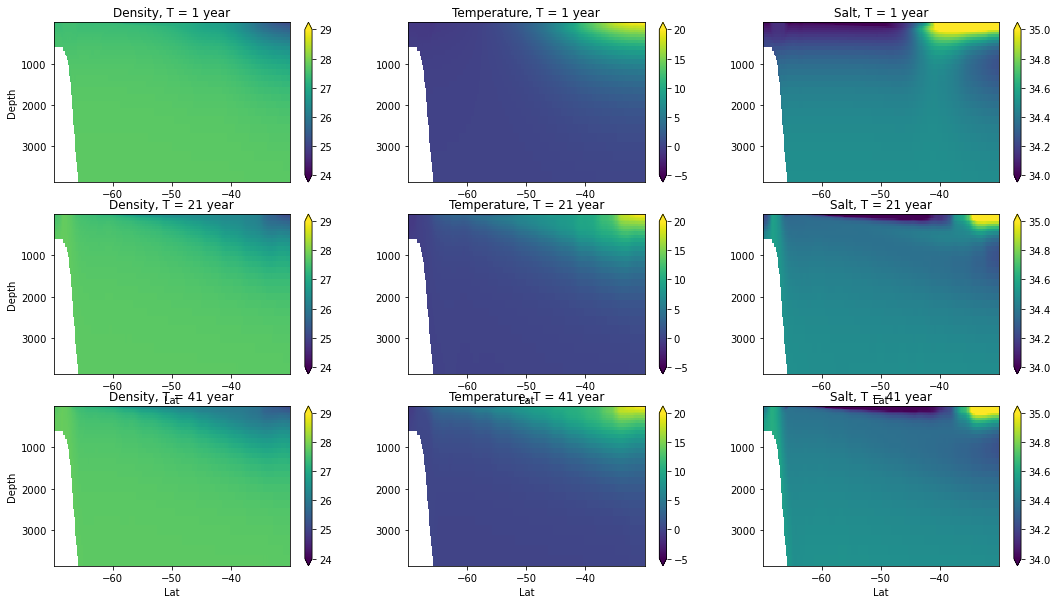

In [11]:
plt.figure(figsize=(18,10))

ct = 0
for i in range(0,50,20):
    plt.subplot(3,3,3*ct + 1)
    tmp = sigma.isel(Time = i, xh=240)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = 24.0, vmax = 29.0)
    plt.colorbar(extend='both')
    plt.ylabel('Depth')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Density, T = ' + str(i+1) + ' year')
    plt.gca().invert_yaxis()
    
    plt.subplot(3,3,3*ct + 2)
    tmp = ds_z['temp'].isel(Time = i, xh=240)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = -5, vmax = 20.)
    plt.colorbar(extend='both')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Temperature, T = ' + str(i+1) + ' year')
    plt.gca().invert_yaxis()
    
    plt.subplot(3,3,3*ct + 3)
    tmp = ds_z['salt'].isel(Time = i, xh=240)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = 34.0, vmax = 35.0)
    plt.colorbar(extend='both')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Salt, T = ' + str(i+1) + ' year')
    plt.gca().invert_yaxis()
    
    ct = ct + 1

Text(0.5, 1.0, '67 S')

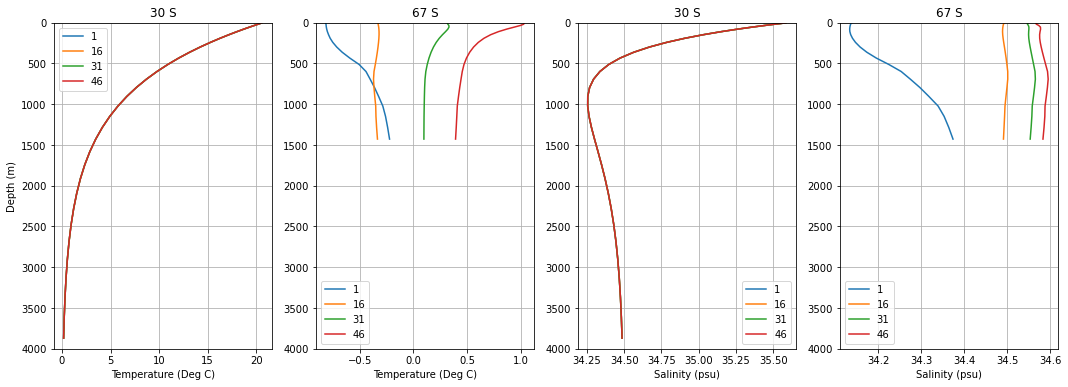

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
for i in range(0,50,15):
    tmp = ds_z['temp'].isel(Time=i).sel(yh=slice(-31.0, -30.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Temperature (Deg C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.title('30 S')

plt.subplot(1,4,2)
for i in range(0,50,15):
    tmp = ds_z['temp'].isel(Time=i).sel(yh=slice(-68.0, -67.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Temperature (Deg C)')
plt.legend()
plt.title('67 S')

plt.subplot(1,4,3)
for i in range(0,50,15):
    tmp = ds_z['salt'].isel(Time=i).sel(yh=slice(-31.0, -30.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Salinity (psu)')
plt.title('30 S')
plt.legend()

plt.subplot(1,4,4)
for i in range(0,50,15):
    tmp = ds_z['salt'].isel(Time=i).sel(yh=slice(-68.0, -67.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Salinity (psu)')
plt.legend()
plt.title('67 S')

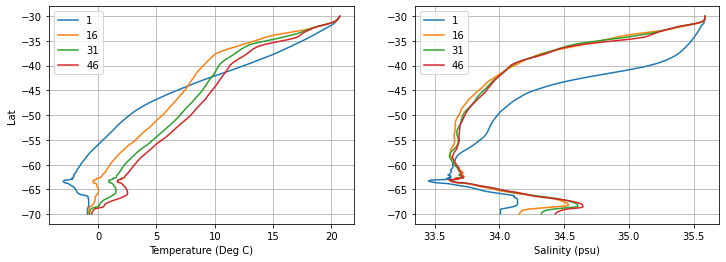

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
for i in range(0,50,15):
    tmp = ds_z['temp'].isel(Time=i).isel(z_l=0).mean('xh')
    plt.plot(tmp, ds_z['yh'], label = str(i+1))
plt.grid()
plt.xlabel('Temperature (Deg C)')
plt.ylabel('Lat')
plt.legend()

plt.subplot(1,2,2)
for i in range(0,50,15):
    tmp = ds_z['salt'].isel(Time=i).isel(z_l=0).mean('xh')
    plt.plot(tmp, ds_z['yh'], label = str(i+1))
plt.grid()
plt.xlabel('Salinity (psu)')
plt.legend()

$\large \text{Overturning Circulation}$

$$ \overline{\psi}(y,z) = - \int_0^{z}\overline{v}(y,z')dz'$$

$$\psi^*(y,z) = - \sum_{z'<z} \overline{vh}(y,z')$$

$$\psi_{eddy} = \psi^* - \overline{\psi}$$

$z$ is the depth and varies between (0, -$H$)

In [13]:
ds1 = ds_z.mean(['xh', 'xq']) #.sel(xh=slice(50.,80.), xq =slice(50.,80.)).mean(['xh', 'xq'])
dz = grid.diff(ds1['z_i'], axis='Z')

In [14]:
# -ve sign is omitted because cusum performs integration from top to bottom as z_l is positive with depth

psi_m = grid.cumsum(ds1['v'] * dz * ds1['dxCv'], 'Z', boundary='fill')

#psi_m =  -tmp #- (ds1['v'] * dz * ds1['dxCv'] + tmp - 0*tmp.isel(z_l=34))

psi = grid.cumsum(ds1['vmo'], 'Z', boundary='fill')

#psi = - tmp #(ds1['vmo'] + tmp  - tmp.isel(z_l=34))

psi = psi / 1035.

psi_e = psi - psi_m     

print(psi, psi_m)

<xarray.DataArray 'concatenate-198e5cbd99d041ec317b7c17f3ab3b74' (Time: 50, z_i: 36, yq: 272)>
dask.array<truediv, shape=(50, 36, 272), dtype=float32, chunksize=(40, 35, 272), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 180.0 540.0 900.0 ... 1.71e+04 1.746e+04 1.782e+04
  * z_i      (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * yq       (yq) float64 -69.89 -69.81 -69.72 -69.64 ... -30.35 -30.13 -29.92 <xarray.DataArray 'concatenate-606188877cdc9495880fdba92a46924e' (Time: 50, z_i: 36, yq: 272)>
dask.array<concatenate, shape=(50, 36, 272), dtype=float64, chunksize=(40, 35, 272), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 180.0 540.0 900.0 ... 1.71e+04 1.746e+04 1.782e+04
  * z_i      (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * yq       (yq) float64 -69.89 -69.81 -69.72 -69.64 ... -30.35 -30.13 -29.92


In [30]:
print(rho)

<xarray.DataArray (z_l: 35, yh: 272, xh: 320)>
dask.array<mean_agg-aggregate, shape=(35, 272, 320), dtype=float32, chunksize=(35, 272, 320), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 79.12 79.38 79.62 79.88
  * yh       (yh) float64 -69.94 -69.85 -69.77 -69.68 ... -30.46 -30.24 -30.02
  * z_l      (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03


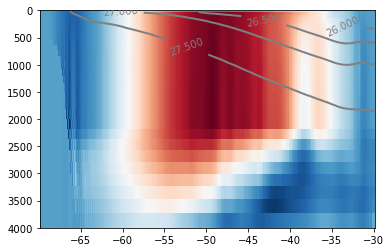

In [32]:
rho_lev = [26.0, 26.5, 27.0, 27.5, 28.0]
tmp = psi.isel(Time=slice(20,40)).mean('Time')
rho = sigma.isel(Time=slice(20,40)).mean(['Time','xh'])
plt.pcolor(ds1['yq'], ds1['z_i'], tmp, cmap='RdBu_r')
CS = plt.contour(ds1['yq'], ds1['z_l'], rho, rho_lev, colors='gray', linewidths=2)
plt.clabel(CS, inline=True, fontsize=10)
plt.gca().invert_yaxis()

In [16]:
# Sensibility check

tmp1 = (ds1['v'] * dz * ds1['dxCv']).isel(Time=0)

psi1 = 0. * tmp1.values

tmp2 = (ds1['vmo']).isel(Time=0) / 1035.0

psi2 = 0. * tmp2.values

for i in range(34,-1,-1):
    
#for i in range(0,35):

    if(i==34):
    
        psi1[i,:] = tmp1.values[i,:]
        psi2[i,:] = tmp2.values[i,:]
    
    else:
        psi1[i,:] = psi1[i+1,:] + tmp1.values[i,:]
        psi2[i,:] = psi2[i+1,:] + tmp2.values[i,:]
    

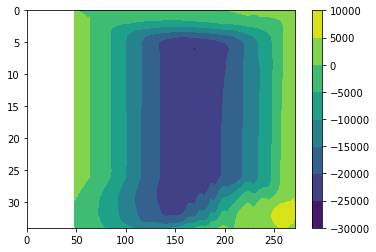

In [17]:
plt.contourf(psi2)
plt.gca().invert_yaxis()
plt.colorbar()

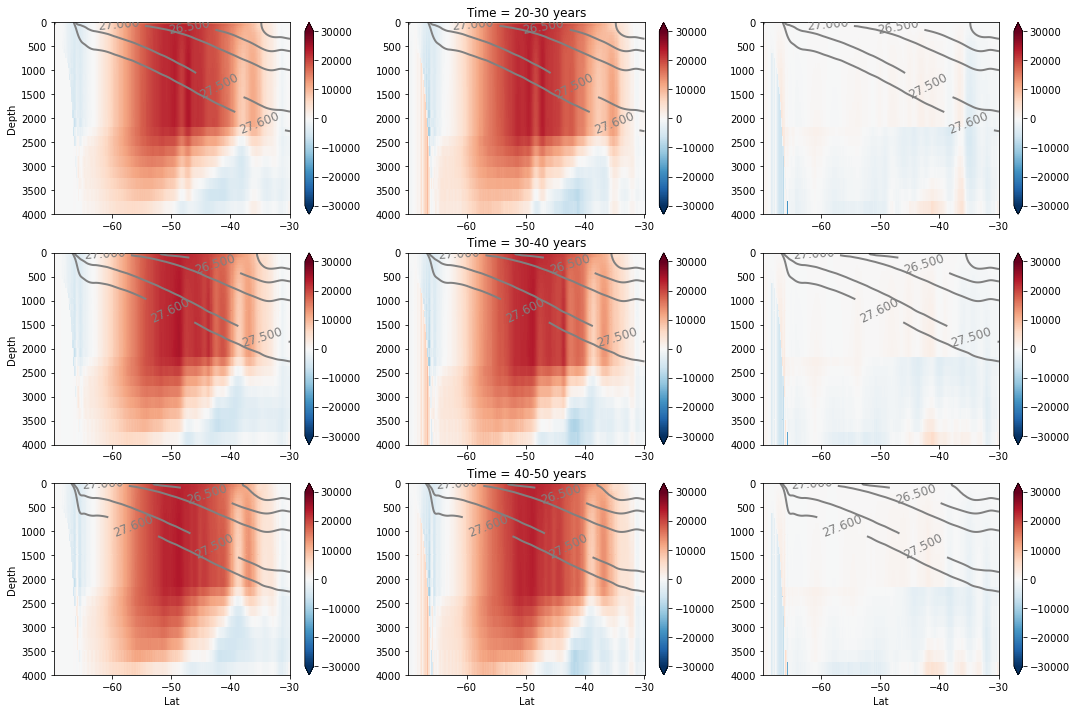

In [35]:
plt.figure(figsize=(18,12))

rho_lev = [26.0, 26.5, 27.0, 27.5, 27.6]

max_r = 3.e4
for ct in range(0,3):
    
    rho = sigma.isel(Time=slice(10*(ct+2), 10*(ct+3))).mean(['Time','xh'])
    
    plt.subplot(3,3,3*ct + 1)
    tmp1 = psi.isel(Time=slice(10*(ct+2), 10*(ct+3))).mean('Time').load()
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp1, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yq'], ds1['z_l'], rho, rho_lev, colors='gray', linewidths=2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.ylabel('Depth')
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()

    plt.subplot(3,3,3*ct + 2)
    tmp2 = psi_m.isel(Time=slice(10*(ct+2), 10*(ct+3))).mean('Time').load()
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp2, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yq'], ds1['z_l'], rho, rho_lev, colors='gray', linewidths=2)
    plt.clabel(CS, inline=True, fontsize=12)
    strin = 'Time = '+ str((ct+2)*10)+'-'+str((ct+3)*10)+ ' years'
    plt.title(strin)
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()

    plt.subplot(3,3,3*ct + 3)
    tmp = tmp1 - tmp2 #psi_e.isel(Time=slice(10*(ct+2), 10*(ct+3))).mean('Time')
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yq'], ds1['z_l'], rho, rho_lev, colors='gray', linewidths=2)
    plt.clabel(CS, inline=True, fontsize=12)
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()
    

In [29]:
print(ds1)

<xarray.Dataset>
Dimensions:      (Time: 50, nv: 2, yh: 272, yq: 272, z_i: 36, z_l: 35)
Coordinates:
  * yh           (yh) float64 -69.94 -69.85 -69.77 ... -30.46 -30.24 -30.02
  * z_l          (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * z_i          (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * Time         (Time) float64 180.0 540.0 900.0 ... 1.746e+04 1.782e+04
  * nv           (nv) float64 1.0 2.0
  * yq           (yq) float64 -69.89 -69.81 -69.72 ... -30.35 -30.13 -29.92
Data variables:
    temp         (Time, z_l, yh) float32 dask.array<chunksize=(10, 35, 272), meta=np.ndarray>
    salt         (Time, z_l, yh) float32 dask.array<chunksize=(10, 35, 272), meta=np.ndarray>
    u            (Time, z_l, yh) float32 dask.array<chunksize=(10, 35, 272), meta=np.ndarray>
    v            (Time, z_l, yq) float32 dask.array<chunksize=(10, 35, 272), meta=np.ndarray>
    umo          (Time, z_l, yh) float32 dask.array<chunksize=(10, 35, 272), meta

In [36]:
#ds_rho.close()
ds_z.close()
client.close()
cluster.close()

$\Large \text{Sponge Check}$

In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star//TS_Wright/"
ds_z = xr.open_dataset(ppdir+"sponge_Matt/prog_z.nc",chunks={"Time": 1},decode_times=False)
#ds = xr.open_dataset(ppdir+"sponge_check/prog.nc",chunks={"Time": 1},decode_times=False)